# Lab3 - Hierarchical workload

### Create simple 2 serial tasks workload

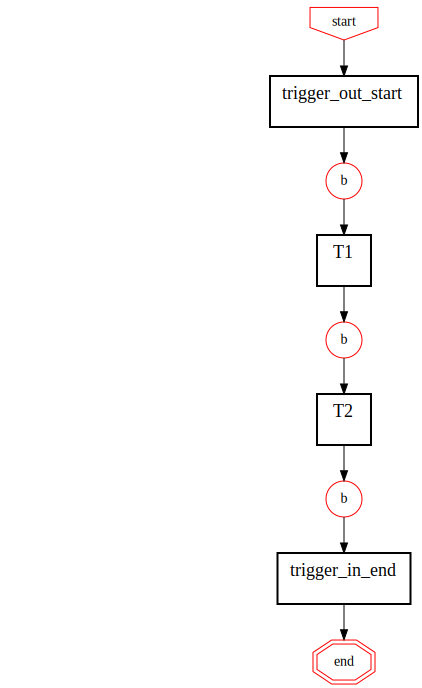

In [1]:
# Creating simple workload
from asap.workload import Workload, Task, Connection, TYPES

s = Task('start', TYPES.START)
t1 = Task('T1', TYPES.PROC, processing_cycles=1000)
t2 = Task('T2', TYPES.PROC, processing_cycles=1300)
e = Task('end', TYPES.END)

hier_wl = Workload('hier_wl', [s, t1, t2, e], [Connection('con1', s, t1), Connection('con2', t1, t2), Connection('con3', t2, e)])
hier_wl

### Mapping hierarchical workload

In [2]:
# importing workload
from labs.lab1_creating_platform import create_platform_step_by_step
from asap.mapping import Mapping

# Mapping hier workload
sys_platform = create_platform_step_by_step()
hier_mapping = Mapping('hier_mapping', hier_wl)
hier_mapping.map_task(t1, sys_platform.get_ip('CPU1'))
hier_mapping.map_task(t2, sys_platform.get_ip('CPU1'))

Validating System platform: MTL...
System platform is valid!


### Creating hierarchical task uses above workload

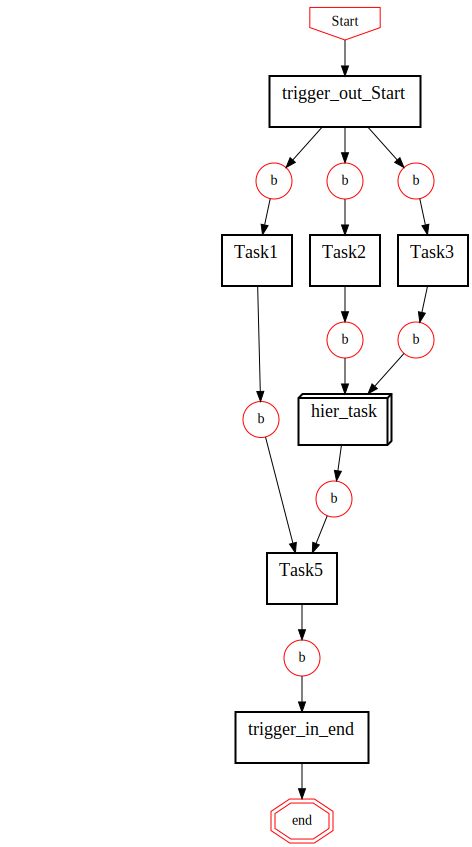

In [3]:
from labs.lab2_creating_workload import create_workload
from asap.workload import WlTask

workload = create_workload()

workload.del_task_by_name('Task4')

wl_task = WlTask('hier_task', hier_wl, hier_mapping)
workload.add_task(wl_task)
task2 = workload.get_task('Task2')
task3 = workload.get_task('Task3')
task5 = workload.get_task('Task5')
workload.connect_tasks('con5', task2, wl_task)
workload.connect_tasks('con6', task3, wl_task)
workload.connect_tasks('con7', wl_task, task5)
workload

### Creating Mapping and Simulating

In [4]:
from asap.mapping import Mapping
from speedsim import SpeedSim

gt = sys_platform.get_ip('GT')
cpu1 = sys_platform.get_ip('CPU1')
cpu2 = sys_platform.get_ip('CPU2')

mapping = Mapping('mapping', workload)
mapping.map_task(workload.get_task('Task1'), gt)
mapping.map_task(workload.get_task('Task2'), cpu1)
mapping.map_task(workload.get_task('Task3'), cpu2)
mapping.map_task(workload.get_task('Task5'), gt)

speedsim = SpeedSim(sys_platform, workload, mapping)
res = speedsim.simulate()
res

,START,FINISH,TRANSITION,RESOURCE,RESOURCE_IDX,DURATION
0,0.0,10.0,Task1,GT/ex_ug,0,10.0
1,0.0,10.0,Task2,CPU1/ex_u1,0,10.0
2,0.0,10.0,Task3,CPU2/ex_u2,0,10.0
3,10.0,20.0,hier_task/T1,CPU1/ex_u1,0,10.0
4,20.0,33.0,hier_task/T2,CPU1/ex_u1,0,13.0
5,33.0,41.0,Task5,GT/ex_ug,0,8.0


#### Viewing results

In [12]:
from post_processing.utils import create_task_analysis_fig
from bokeh.plotting import show, output_notebook
output_notebook()

fig = create_task_analysis_fig(res)
show(fig)

Loading BokehJS ...